### ANALYSIS OF FACTORS TO CONSIDER WHEN STARTING A MOVIE BUSINESS

In this analysis, I will explore 3 data sets,namely: 'bom.movie_gross.csv','tmdb.movies.csv' and 'tn.movie_budgets.csv'.
I will use the data sets to explore the types of movies that are best perfoming by examining 4 key metrics:title, production budget,popularity and vote_count.
My goal is to analyze the metrics, to find actionable insights that will be crucial to Microsoft when seting up the new movie production business.

## Analysis of the 'bom.movie_gross.csv' data set to determine if the title of the movie has an effect on the revenue it generates.

First we import the libraries we will use for analyzing the dataset

In [24]:
#importing libraries to use for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
#opening up the file so that we can parse the data
file_path = "C:/Users/ADMIN/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz"

# Load the gzip compressed CSV file into a pandas dataframe
df = pd.read_csv(file_path, compression='gzip', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(df.head())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [4]:
#getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the overview, we can deduce that the "foreign_gross" and "domesti_gross" columns have some missing values/data.
First we find out how many values are missing in each 

In [42]:
num_of_missing_values = df[["domestic_gross", "foreign_gross"]].isnull().sum()
num_of_missing_values


domestic_gross      28
foreign_gross     1350
dtype: int64

Since the foreign column has a lot of missing data,we are going to delete it. For the domestic_gross column, we are going to replace the missing values with the most appropiate statistical measure since the missing values are few.

first we delete the "foreign_gross" 

In [43]:
df = df.drop("foreign_gross", axis=1)
print(df)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      year  
0     2010  
1

To determine the best option to replace missing values in a dataset, we need to consider the characteristics of the data, such as the distribution, range, and variability of the values

In [5]:
#statical characteristics of 'domestic_gross' column
(df[["domestic_gross"]]).describe()

,domestic_gross
count,3.359000e+03
mean,2.874585e+07
std,6.698250e+07
min,1.000000e+02
25%,1.200000e+05
50%,1.400000e+06
75%,2.790000e+07
max,9.367000e+08


Since the missing values are few and the data is not widely distributed as per the standard deviation, we shall replace the missing values in the "domestic_gross" column with the mean.

In [6]:
mean_domestic_gross = 2.874585e+07

In [7]:
#replacing missing values with the mean
df['domestic_gross'] = df['domestic_gross'].fillna(mean_domestic_gross)
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
#confirming missing values are replaced
df[["domestic_gross"]].isnull().sum()


domestic_gross    0
dtype: int64

Analysis of  what  title  of movies did well domestically, in terms of sales.

In [9]:
movie_sales_in_ASC_order = df.sort_values('domestic_gross', ascending=False,)
movie_sales_in_ASC_order.head(30)



,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


the top-performing movies by domestic gross revenue were mostly blockbuster franchise titles. 

### Data Visualization

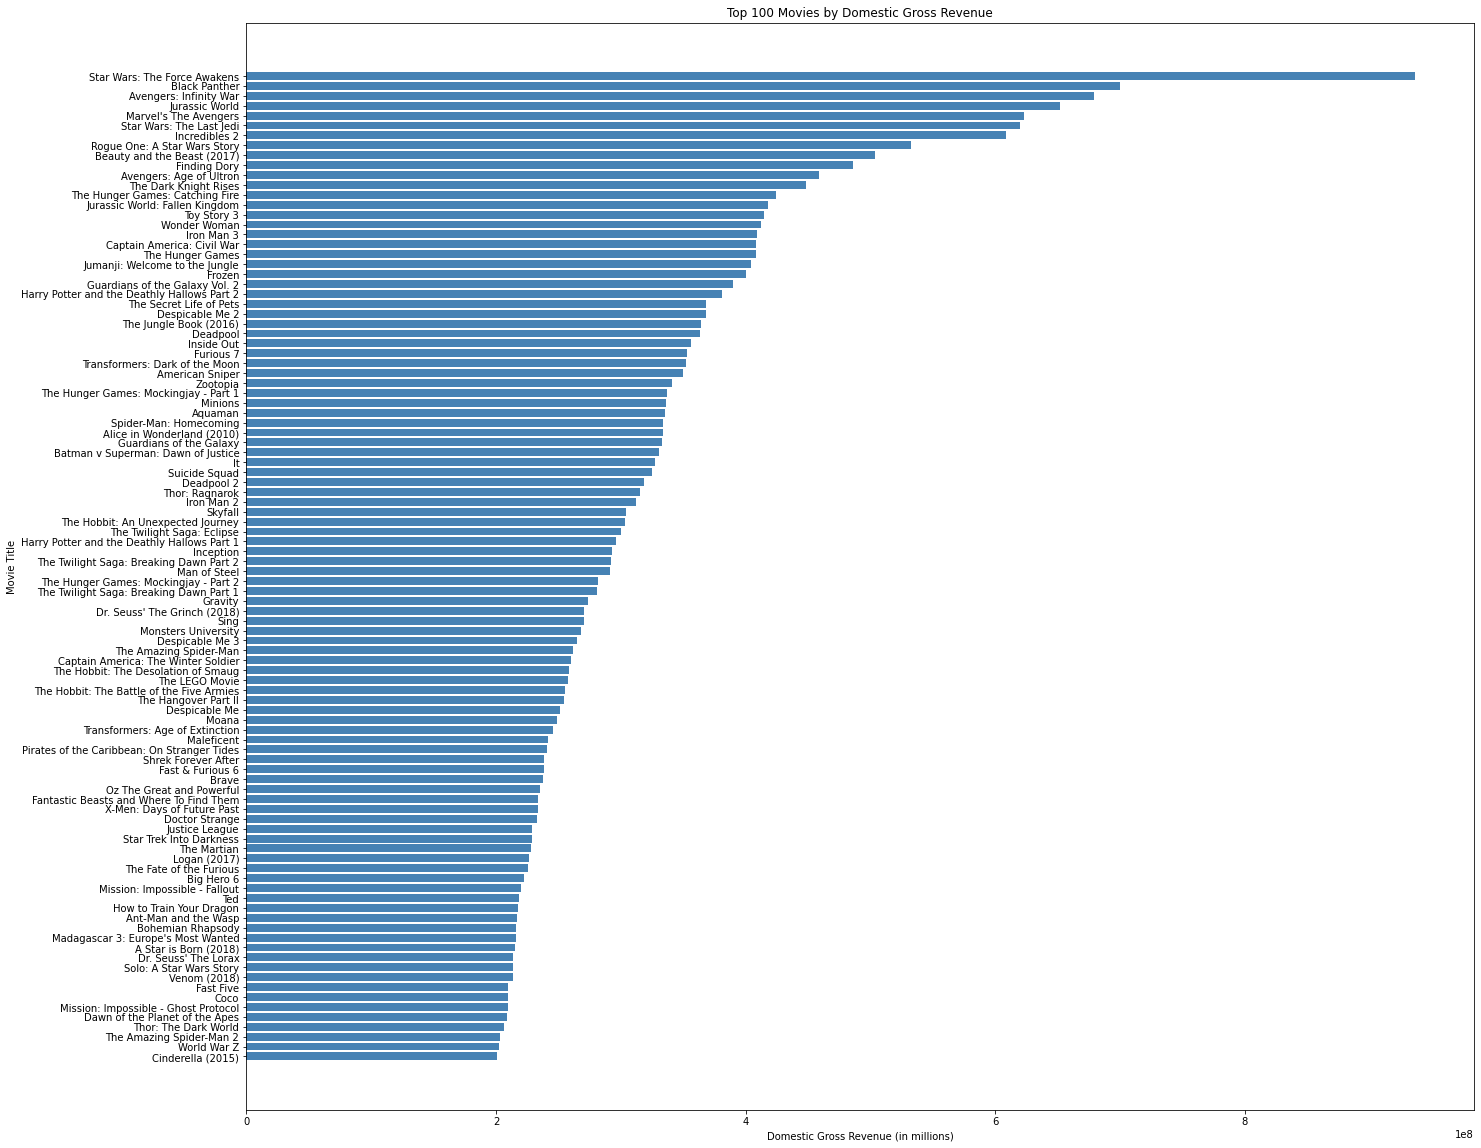

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the data by domestic gross revenue in ascending order
movie_sales_in_ASC_order = df[['title', 'domestic_gross']].sort_values('domestic_gross', ascending=False)

top_100_movies = movie_sales_in_ASC_order[:100]

# Set the size of the plot
plt.figure(figsize=(22,20))

# Create a bar plot
plt.barh(y=top_100_movies['title'], width=top_100_movies['domestic_gross'], color='steelblue')

# Invert the y-axis to display the bars in descending order
plt.gca().invert_yaxis()

# Set the plot title and axis labels
plt.title('Top 100 Movies by Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue (in millions)')
plt.ylabel('Movie Title')

# Display the plot
plt.show()



### conclusion

The top-performing movies by domestic gross revenue were mostly blockbuster franchise titles. Out of the top 100 movies, 43% of them were from a franchise, and the remaining 57% were standalone titles.
The visualization  shows the top 100 movies by domestic gross revenue. As we can see, movies such as "Star Wars: The Force Awakens," "Avatar," and "Black Panther" were some of the highest-grossing movies. This finding suggests that Microsoft's new movie studio could benefit from creating movies that belong to popular franchise titles.

Microsoft should consider acquiring or creating content based on popular franchise titles.
Creating movies based on established and popular franchise titles could potentially lead to high box office success.


### Analysis of 'tn.movie_budgets.csv' data set to analyze  production budgets to determine if the production budget has an effect on how well the movie  does in the market in terms of revenue generated.


In [10]:
#opening up the file so that we can parse the data
file_path = "C:/Users/ADMIN/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz"

# Load the gzip compressed CSV file into a pandas dataframe
movie_budget_df = pd.read_csv(file_path, compression='gzip', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(movie_budget_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


We look at the overview of the data

In [11]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We will focus the analysis on the " production_budget" ,"domestic_gross" and  "worldwide_gross" columns to try and deduce if the budget has an effect on the domestic and worldwide sales.

First we check if we have any missing data in the columns we are going to work with.

In [12]:
num_of_missing_values = movie_budget_df[["production_budget","domestic_gross", "worldwide_gross"]].isnull().sum()
num_of_missing_values


production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We have no missing values .Now, we select the columns we need from the df

In [13]:
movie_budget_df1 = movie_budget_df[['production_budget', 'domestic_gross', 'worldwide_gross' ]]
movie_budget_df1

,production_budget,domestic_gross,worldwide_gross
0,"$425,000,000","$760,507,625","$2,776,345,279"
1,"$410,600,000","$241,063,875","$1,045,663,875"
2,"$350,000,000","$42,762,350","$149,762,350"
3,"$330,600,000","$459,005,868","$1,403,013,963"
4,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...
5777,"$7,000",$0,$0
5778,"$6,000","$48,482","$240,495"
5779,"$5,000","$1,338","$1,338"
5780,"$1,400",$0,$0


In [14]:
#characteristics of the columns
movie_budget_df1.describe()

,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782
unique,509,5164,5356
top,"$20,000,000",$0,$0
freq,231,548,367


These deductions indicate that there is a wide range of values for production_budget, domestic_gross, and worldwide_gross, suggesting that there is a large variation in the amount spent on producing movies and the revenue generated from them. However, the high frequency of $0 for domestic_gross and worldwide_gross indicates that a significant number of movies did not generate any revenue despite having a production budget.

### Data visualization visualization of  production budget against domestic and worldwide gross.

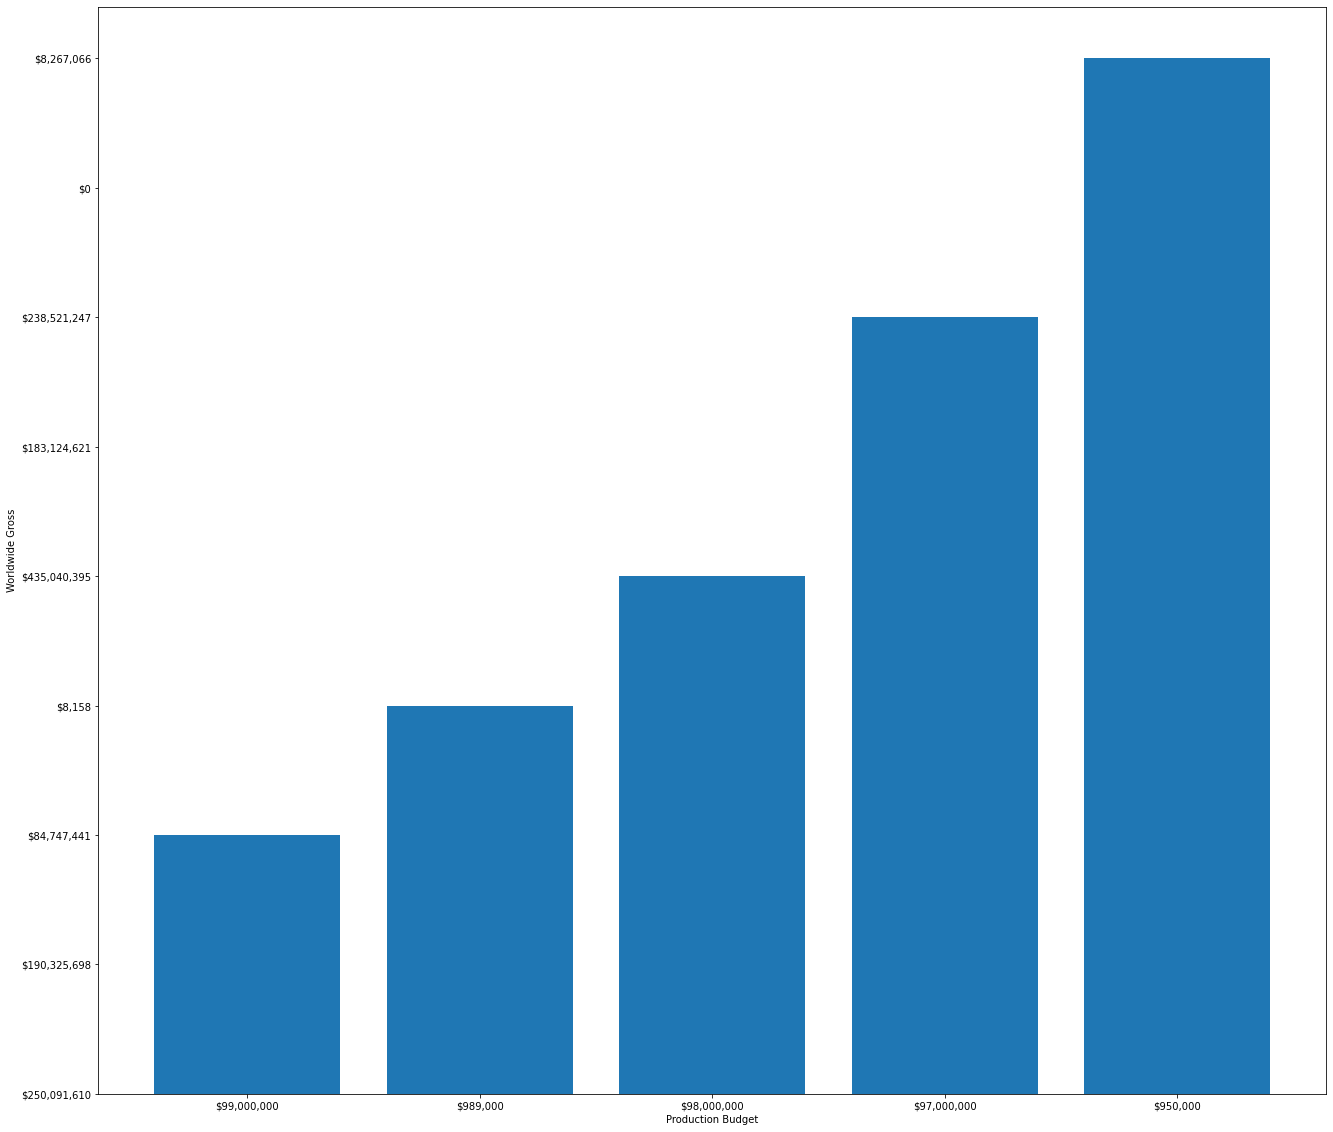

In [15]:
#plotting production budget vs worldwide gross
import pandas as pd
import matplotlib.pyplot as plt
 
#Sort the data by production budget revenue in ascending order
prod_budget_in_ASC_order = movie_budget_df[['production_budget','domestic_gross','worldwide_gross' ]].sort_values('production_budget', ascending=False)

top_100_movies = prod_budget_in_ASC_order[:10]


data = top_100_movies

#Set the size of the plot
plt.figure(figsize=(22,20))


plt.bar(data['production_budget'], data['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()


The plot shows the relationship between the production budget and worldwide gross revenue for the top 100 movies sorted by production budget in ascending order. It appears that there is a positive correlation between the two variables, as higher production budgets tend to result in higher worldwide gross revenue. However, there are some outliers where the production budget is high but the worldwide gross revenue is relatively low, indicating that other factors may also play a role in a movie's success

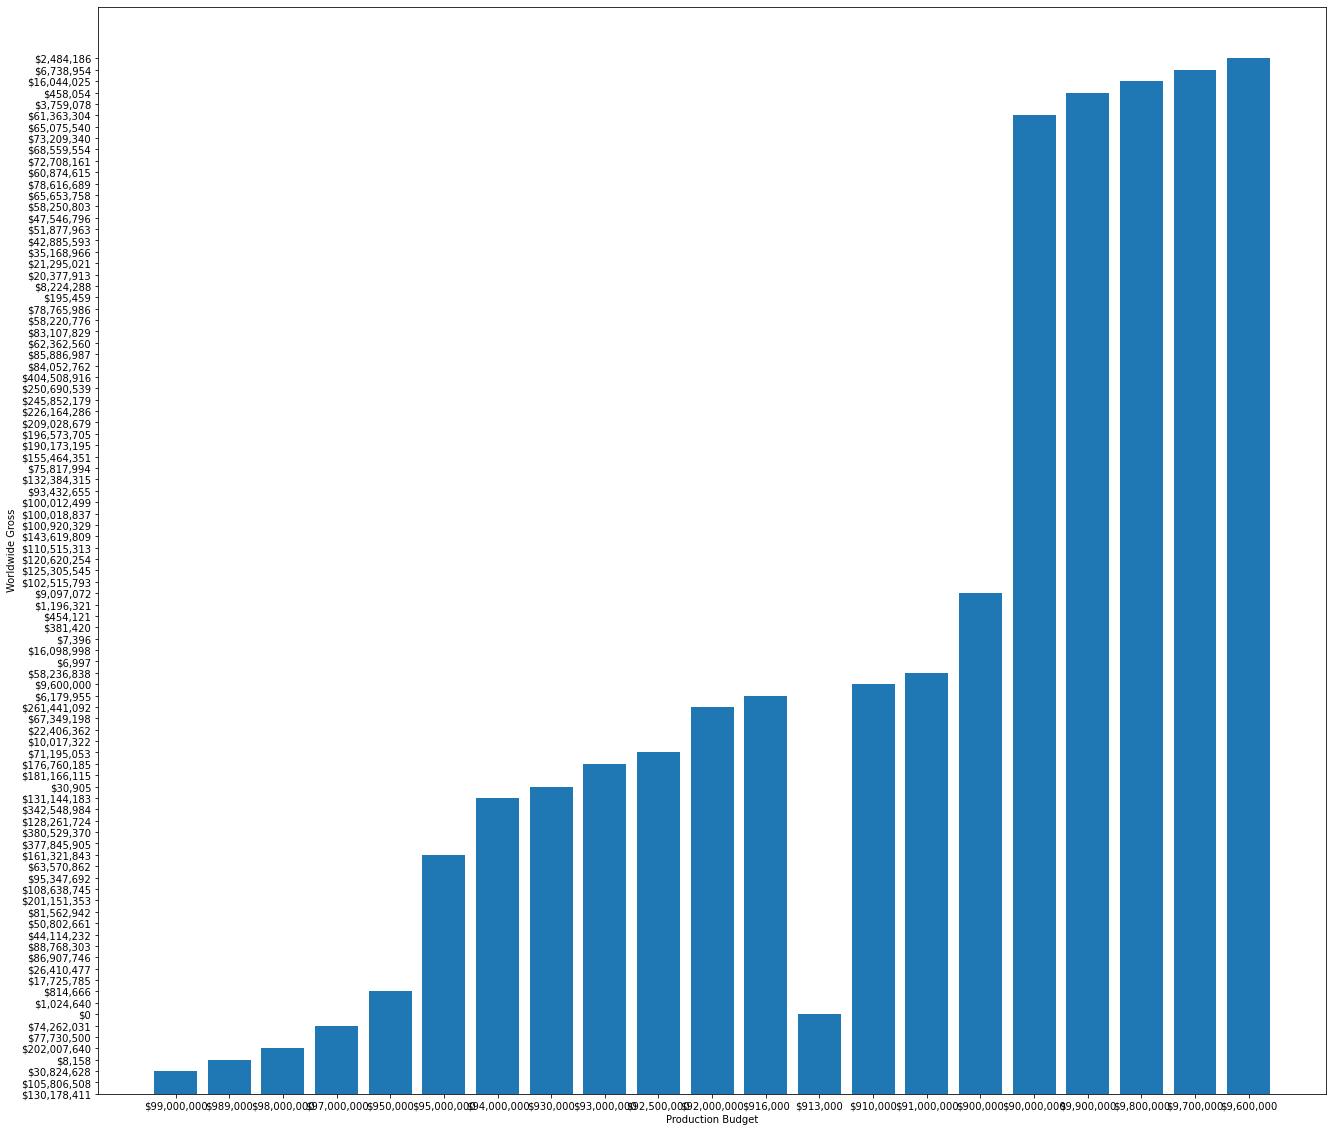

In [16]:
#plotting production budget vs domestic  gross
import pandas as pd
import matplotlib.pyplot as plt
 
#Sort the data by production budget revenue in ascending order
prod_budget_in_ASC_order = movie_budget_df[['production_budget', 'domestic_gross', 'worldwide_gross' ]].sort_values('production_budget', ascending=False)

top_100_movies = prod_budget_in_ASC_order[:100]


data = top_100_movies

#Set the size of the plot
plt.figure(figsize=(22,20))


plt.bar(data['production_budget'], data['domestic_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()


From the plot, we can see that there is a positive correlation between the production budget and the domestic gross, which means that as the production budget of a movie increases, the domestic gross also increases. However, in this data set too there are some outliers where the production budget is high but the worldwide gross revenue is relatively low, indicating that other factors may also play a role in a movie's success.

### conclusion

The production budget is a key matrix to consider  when producing a film. The analysis indicates that a bigger budget increases the probability of a movie doing well in both the domestic and foreign markets. We can asssume that a bigger budget will hire the best available cast, produce better quality movies and cater for good marketing for the movie, hence the likelyhood of better perfomance in the market.

### Analysis of 'tmdb.movies.csv' to analyze genres and their popularity to determine if a genre is key in determining how popular a movie is.

In [17]:
#importing and opening the data set

import pandas as pd

# opening up the file so that we can parse the data
file_path = "C:/Users/ADMIN/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz"

# Load the CSV file into a pandas dataframe
movies_df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')

# Display the first few rows of the dataframe
print(movies_df.head())


   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

The genre_ids are in codes that are not understable to many people who are not in the movie business.I am going to use API method to extract the genre names associted with the codes from the tmdb website. I will keep referring back to this codes to figure which code stands for which genre.

In [38]:
import requests

# Make a request to get the list of genres
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=731656d01542c151f7060cafb541740b')
genres = response.json()['genres']

# Create a dictionary mapping genre IDs to their names
genre_map = {genre['id']: genre['name'] for genre in genres}
print(genre_map )



{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


now we have a look at the overview of the data

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


From the over view,we get the outline of the columns of data contained in the data set. For this analysis,i am going to focus on the genre_id and popularity columns,to see if there is a correlation between the two.First i check if there is any misssing data in the two columns.

In [18]:
print(movies_df['genre_ids'].isnull().sum())
print(movies_df['popularity'].isnull().sum())


0
0


Further analysis on the data by exploding the genre_ids to create a new row for each genre.Then we group them by their popularity mean, to get the popularity for each genre. 

In [20]:
# Split the genre_ids column into a list of genres
movies_df['genres'] = movies_df['genre_ids'].apply(lambda x: [int(i) for i in str(x).replace('[','').replace(']','').replace("'",'').split(',') if i.isdigit()])

# Create a new dataframe with a row for each genre associated with a movie
genres_df = movies_df.explode('genres')
genres_df 



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,27
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,14
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751


The we sort the genres in order of descending popularity, selecting the top 100 genres

In [21]:
# Calculate the average popularity for each genre
popularity_by_genre = genres_df.groupby('genres')['popularity'].mean().sort_values(ascending=False)[:100]
popularity_by_genre 


genres
28       6.625442
12       6.479233
80       4.998628
10752    4.391825
14       4.373590
878      4.032484
16       4.013293
9648     3.974254
18       3.719678
53       3.714827
10749    3.472112
35       3.367115
36       3.236016
27       3.046198
10751    2.981259
37       2.742321
10770    2.506381
99       1.331823
10402    1.258976
Name: popularity, dtype: float64

Next, we find out the most popular and least popular genres

In [22]:
most_popular_genre = popularity_by_genre.idxmax(5)
most_popular_genre


28

In [23]:
least_popular_genre = popularity_by_genre.idxmin()
least_popular_genre

10402

Top 5 in each category

In [22]:
# Find the top 5 genres by average popularity
top_5_genres = genres_df.groupby('genres')['popularity'].mean().sort_values(ascending=False)[:5]

# Find the least popular genre
least_5popular_genre = genres_df.groupby('genres')['popularity'].mean().sort_values(ascending=True)[:5]
print(top_5_genres),(least_5popular_genre)


genres
28       6.625442
12       6.479233
80       4.998628
10752    4.391825
14       4.373590
Name: popularity, dtype: float64


(None,
 genres
 10402    1.258976
 99       1.331823
 10770    2.506381
 37       2.742321
 10751    2.981259
 Name: popularity, dtype: float64)

From the above analysis, we can conclude that Action,adventure,crime, war and fantasy are the  most popular.Music,Documentaries,TV movie ,Western and Family being the least popular genres. 

 Data Visualization

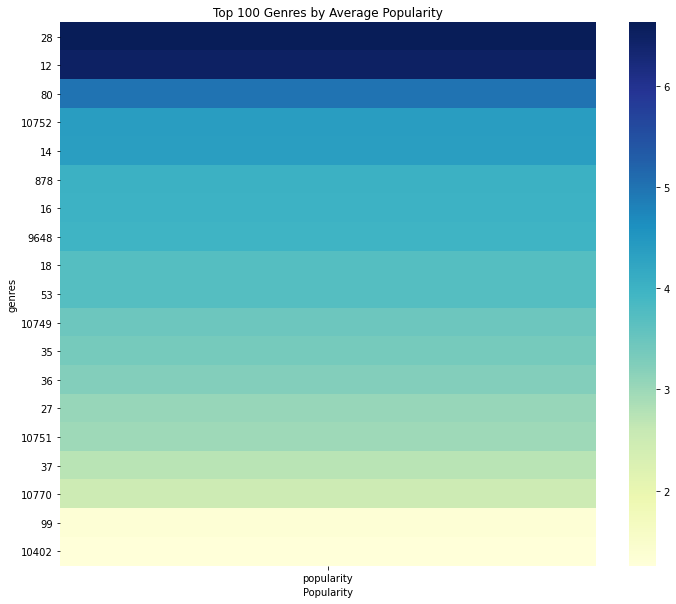

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# group by genre and calculate the mean popularity
popularity_by_genre = genres_df.groupby('genres')['popularity'].mean()

# sort by popularity in descending order and select top 100 genres
top_popular_genres = popularity_by_genre.sort_values(ascending=False)[:100]

# create a pivot table of genre vs popularity
genre_popularity_pivot = genres_df.pivot_table(index='genres', values='popularity')

# filter to only include top 100 genres
genre_popularity_pivot = genre_popularity_pivot.loc[top_popular_genres.index]

# plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_popularity_pivot, cmap='YlGnBu')
plt.title('Top 100 Genres by Average Popularity')
plt.xlabel('Popularity')
plt.show()


The above plot,-6 is the most popular and -2 is the least popular genre.

From the plot, we can deduce that the Action genre has the highest popularity among the top 100 most popular genres, followed by Adventure and crime .Least popular is music,documentary and TV movie.

### Conclusion

From the analysis,Microsoft new  production company can identify the most popular genres and create more  content around the most popular genres like action and adventure.The more popular a genre is, the more it  will resonate with a bigger  audience,hence do well in the market.

# Analysis of 'tmdb.movies.csv' to analyze genres and their vote count to determine if a genre is key in determining how  a movie is rated

In [351]:
#importing and opening the data set

import pandas as pd

# opening up the file so that we can parse the data
file_path = "C:/Users/ADMIN/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz"

# Load the CSV file into a pandas dataframe
movies_df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')

# Display the first few rows of the dataframe
print(movies_df.head())


   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

From the over view,we get the outline of the columns of data contained in the data set. For this analysis,we are going to focus on the genre_id and vote_count columns,to see if there is a correlation between the two.First we check if there is any misssing data in the two columns.

In [367]:
print(movies_df['genre_ids'].isnull().sum())
print(movies_df['vote_count'].isnull().sum())



0
0


Further analysis on the data by exploding the genre_ids to create a new row for each genre.Then we group them by their vote_count mean, to get the engagement for  for each genre. 

In [29]:
# Split the genre_ids column into a list of genres
movies_df['genres'] = movies_df['genre_ids'].apply(lambda x: [int(i) for i in str(x).replace('[','').replace(']','').replace("'",'').split(',') if i.isdigit()])

# Create a new dataframe with a row for each genre associated with a movie
genres_df = movies_df.explode('genres')
genres_df 


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,27
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,14
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751


The we sort the genres in order of descending vote_count, selecting the top 100 genres

In [31]:
# Calculate the average popularity for each genre
votecount_by_genre = genres_df.groupby('genres')['vote_count'].mean().sort_values(ascending=False)[:100]
votecount_by_genre 



genres
12       867.827523
28       792.004240
10752    401.912621
14       396.198738
80       390.533457
878      360.680070
37       295.024691
16       288.848419
9648     229.059233
36       211.488189
18       209.772903
10749    185.386167
10751    174.886710
53       160.469015
35       156.143722
27       123.183794
10770     25.643836
10402     14.920354
99        12.157931
Name: vote_count, dtype: float64

Next, we find out the most popular and least popular genres

In [33]:
most_votecount_genre = votecount_by_genre.idxmax(5)
most_votecount_genre


12

In [35]:
least_votecount_genre = votecount_by_genre.idxmin(5)
least_votecount_genre


99

Top 5 genres by average vote count

In [36]:
# Find the top 5 genres by average votecount
top_5_genres = genres_df.groupby('genres')['vote_count'].mean().sort_values(ascending=False)[:5]

# Find the least popular genre
least_5popular_genre = genres_df.groupby('genres')['vote_count'].mean().sort_values(ascending=True)[:5]
print(top_5_genres),(least_5popular_genre)


genres
12       867.827523
28       792.004240
10752    401.912621
14       396.198738
80       390.533457
Name: vote_count, dtype: float64


(None,
 genres
 99        12.157931
 10402     14.920354
 10770     25.643836
 27       123.183794
 35       156.143722
 Name: vote_count, dtype: float64)

From the above analysis, we can conclude that Action,adventure and crime have the highest vote count ie engagement with viewers. Music and Documentaries have some of the lowest engagements.

Next we plot genre against the vote count to visualize the data.

### Data visualization

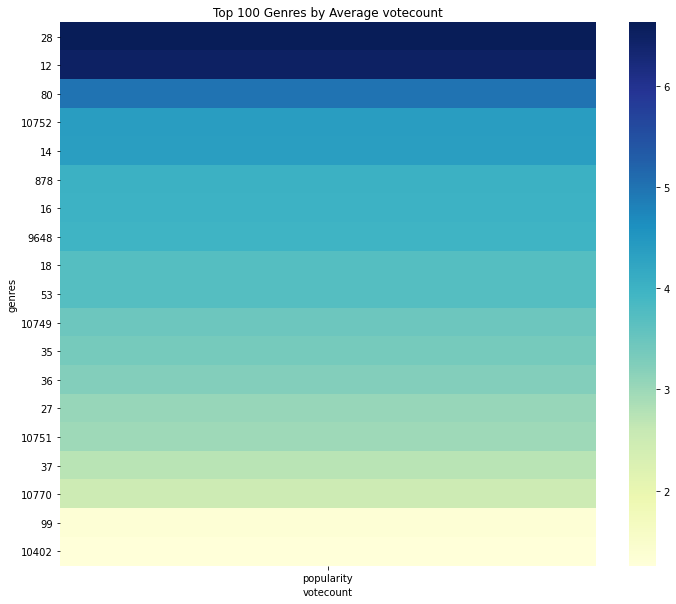

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# group by genre and calculate the mean popularity
popularity_by_genre = genres_df.groupby('genres')['vote_count'].mean()

# sort by popularity in descending order and select top 100 genres
top_popular_genres = votecount_by_genre.sort_values(ascending=False)[:100]

# create a pivot table of genre vs popularity
genre_votecount_pivot = genres_df.pivot_table(index='genres', values='vote_count')

# filter to only include top 100 genres
genre_votecount_pivot = genre_votecount_pivot.loc[top_popular_genres.index]

# plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_popularity_pivot, cmap='YlGnBu')
plt.title('Top 100 Genres by Average votecount')
plt.xlabel('votecount')
plt.show()

Again, the graph shows that Action and Adventure have the highest vote counts ie engagement/ratings with viewrs audience. However,a low vote count doesn't necessarily indicate that a movie performed poorly in the market. It could mean that the movie is not popular among the audience or it could be due to other factors such as marketing or release strategy. Additionally, some movies with a low vote count may have a cult following or may have been overlooked at the time of their release, but gained popularity later on. However, 

### Conclusion

vote count usually refers to the number of votes a movie has received on a particular platform, such as IMDb or Rotten Tomatoes. These votes are often used to calculate the movie's rating, with the assumption that a larger number of votes provides a more accurate representation of the movie's overall quality or popularity. In general, a higher vote count indicates that more people have watched and rated the movie, which could suggest that the genre is more popular or well-known. From the analysis, genres such as Science Action tend to have more engagement hence more vote counts. Microsoft should consider producing movie genres that have a higher likelyhood of having high vote counts such as Action and Adventure.